In [1]:
#!pip install pytorch
# !pip install IPython
# !pip install --upgrade diffusers accelerate transformers
# pip install ipywidgets

# MODEL_ID ='runwayml/stable-diffusion-v1-5'
MODEL_ID ='hakurei/waifu-diffusion'

from diffusers import DiffusionPipeline
pipeline = DiffusionPipeline.from_pretrained(MODEL_ID)
pipeline.to("cuda")

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-08-16 05:24:17.052475: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-16 05:24:17.342598: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-16 05:24:18.289600: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Fetching 15 files

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.19.3",
  "_name_or_path": "hakurei/waifu-diffusion",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

100%|██████████| 50/50 [01:57<00:00,  2.35s/it]


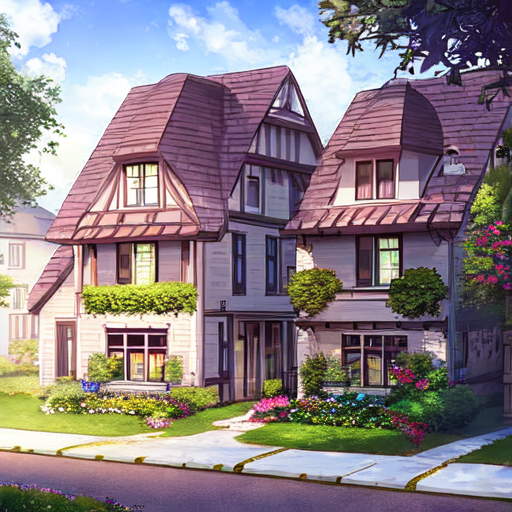

100%|██████████| 50/50 [01:57<00:00,  2.36s/it]


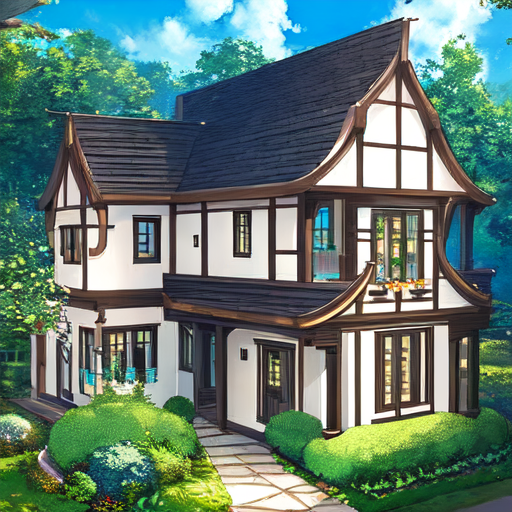

100%|██████████| 50/50 [01:59<00:00,  2.39s/it]


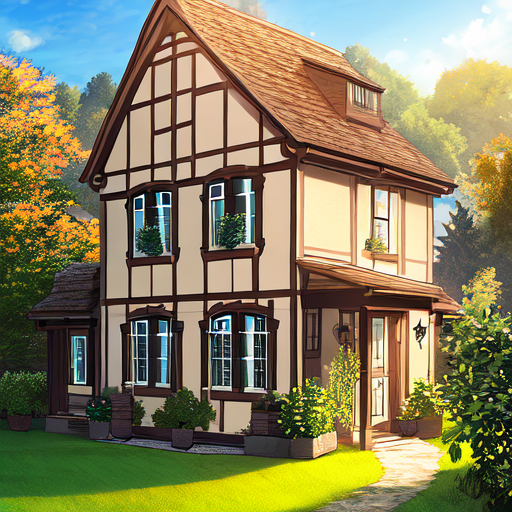

In [2]:
PROMPT = 'high quality,illustration,house,buildings,beautiful,silence,fancy,single picture'

N_PROMPT = 'poor quality,low quality,violence,human,woman,man,people'

REPEAT = 3

from IPython.display import Image,display_png

name = f'\n{PROMPT}\n{N_PROMPT}\n'
# !echo {name} + $(date +"%m%d-%H:%M:%S") >> /content/drive/MyDrive/prompt.txt
for i in range(REPEAT):
    image = pipeline(PROMPT,negative_prompt=N_PROMPT,width=512,height=512).images[0]
    image.save(f'{i}.png',)
    display_png(Image(f'{i}.png'))
    # !mv /content/{i}.png /content/drive/MyDrive/ai_images/$(date +"%m%d-%H:%M:%S").png